In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
titanic_data = pd.read_csv('/content/gdrive/MyDrive/1.Kuliah/Semester-7/Machine_Learning/Praktikum/Praktikum09/Data/titanic.csv')

In [4]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


HANDLING THE MISSING

In [7]:
titanic_data  = titanic_data.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket',], axis=1)

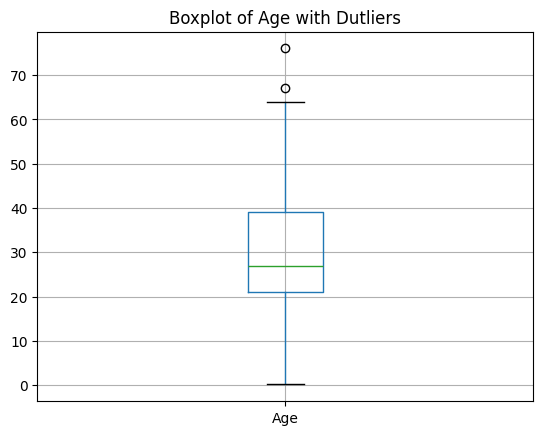

In [8]:
titanic_data.boxplot(column=['Age'])
plt.title("Boxplot of Age with Dutliers")
plt.show()

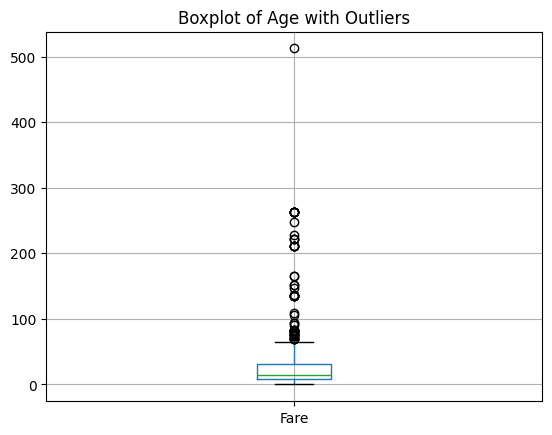

In [9]:
titanic_data.boxplot(column=['Fare'])
plt.title("Boxplot of Age with Outliers")
plt.show()

In [10]:
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)

/tmp/ipython-input-423417795.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
/tmp/ipython-input-423417795.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [11]:
titanic_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [12]:
titanic_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.363636,2.265550,29.599282,0.447368,0.392344,35.576535
std,0.481622,0.841838,12.703770,0.896760,0.981429,55.850103
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [13]:
titanic_data['Survived'].value_counts()

,count
Survived,
0,266
1,152


In [14]:
titanic_data['Sex'].value_counts()

,count
Sex,
male,266
female,152


In [15]:
titanic_data['Pclass'].value_counts()

,count
Pclass,
3,218
1,107
2,93


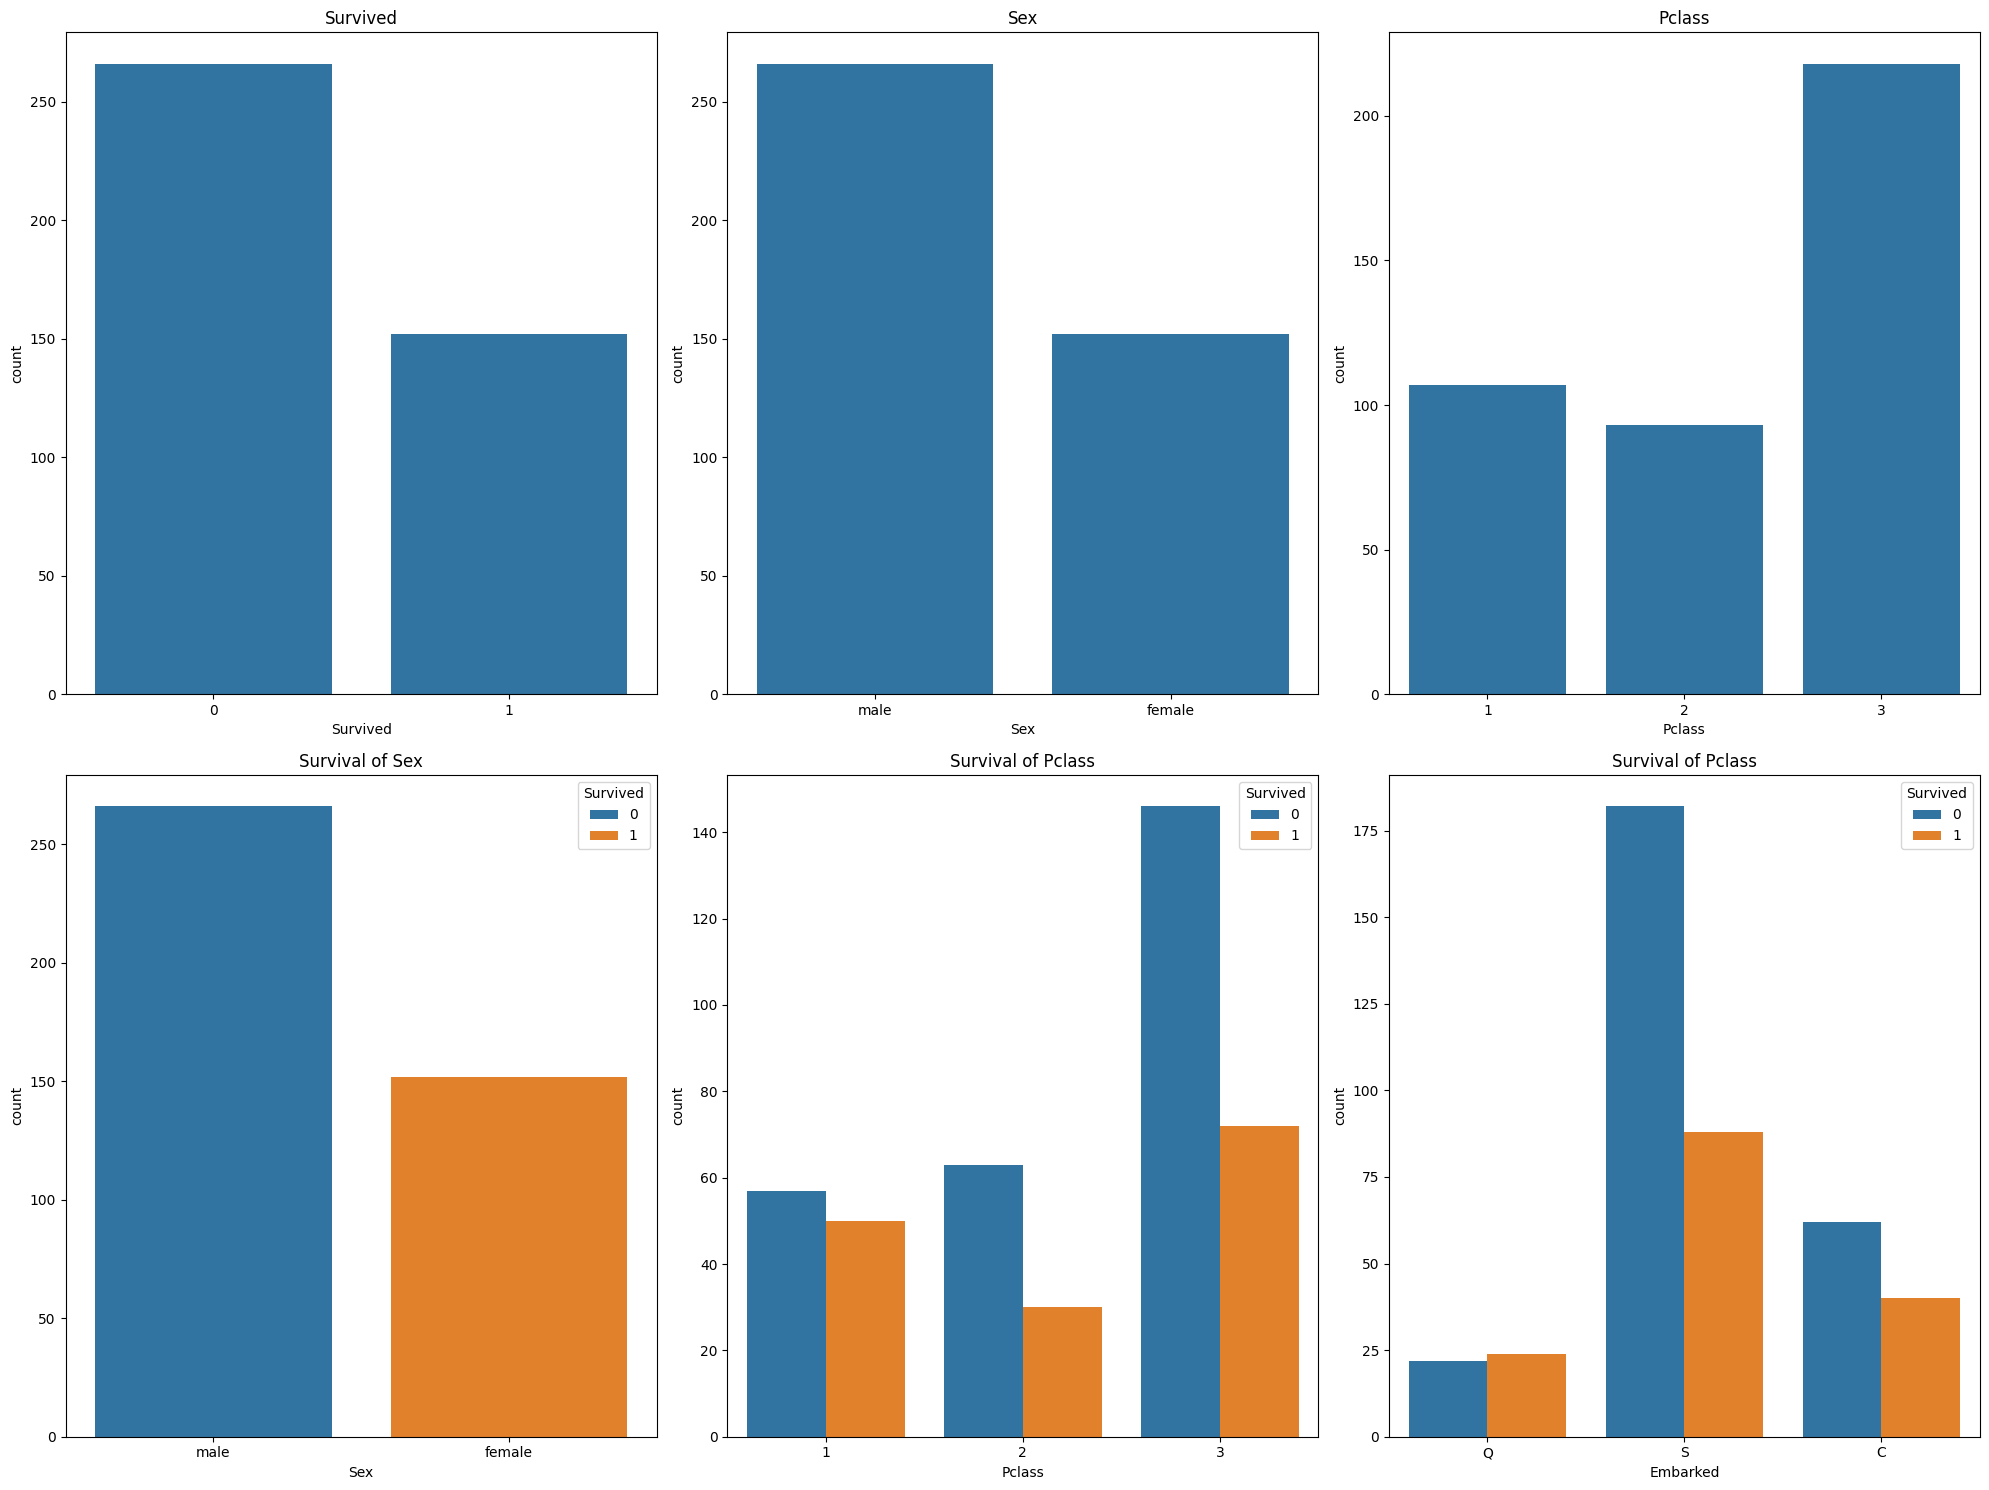

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

axes = axes.flatten()

sns.countplot(x='Survived', data=titanic_data, ax=axes[0])
axes[0].set_title('Survived')

sns.countplot(x='Sex', data=titanic_data, ax=axes[1])
axes[1].set_title('Sex')

sns.countplot(x='Pclass', data=titanic_data, ax=axes[2])
axes[2].set_title('Pclass')

sns.countplot(x='Sex', hue='Survived', data=titanic_data, ax=axes[3])
axes[3].set_title('Survival of Sex')

sns.countplot(x='Pclass', hue='Survived', data=titanic_data, ax=axes[4])
axes[4].set_title('Survival of Pclass')

sns.countplot(x='Embarked', hue='Survived', data=titanic_data, ax=axes[5])
axes[5].set_title('Survival of Pclass')

plt.tight_layout()
plt.show()

In [17]:
replacements = {
    'Sex': {'male': 0, 'female': 1},
    'Embarked': {'S': 0, 'C': 1, 'Q': 2}
}

titanic_data.replace(replacements, inplace=True)

/tmp/ipython-input-3284127860.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  titanic_data.replace(replacements, inplace=True)


In [18]:
X = titanic_data.drop(columns=['Survived'])
Y = titanic_data['Survived']

In [19]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [20]:
Y.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

In [25]:
# Accuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

In [26]:
print("Training Accuracy (NB): ", accuracy_score(Y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score(Y_test, test_pred_nb))

Training Accuracy (NB):  1.0
Testing Accuracy (NB):  1.0


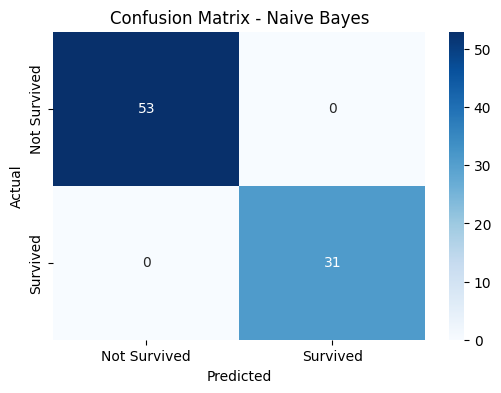

In [27]:
# Visualisasi Confusion Matrix (Naive Bayes)
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [28]:
print("\nClassification Report (NB):")
print(classification_report(Y_test, test_pred_nb))


Classification Report (NB):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [29]:
from sklearn.model_selection import cross_val_score

cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Deviation:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0
Std Deviation: 0.0


Tugas Mandiri 9

In [34]:
cancer_data = pd.read_csv ('https://drive.google.com/uc?export=download&id=1SlYFZCsAwNKFV76rMTTuf4TNg9pf6z3J')
cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [35]:
cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


Perintah cancer_data.tail() digunakan untuk menampilkan beberapa baris terakhir dari dataset cancer_data untuk membantu melihat kondisi data pada bagian paling akhir agar tidak ditemukan nilai yang tampak janggal yang menyulitkan dalam pengolahan data.

In [36]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [37]:
cancer_data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


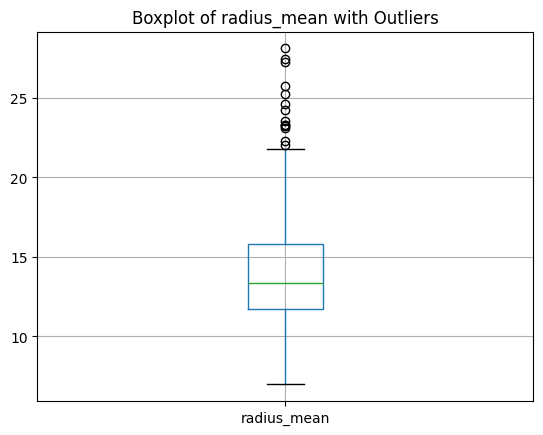

In [38]:
cancer_data.boxplot(column=['radius_mean'])
plt.title("Boxplot of radius_mean with Outliers")
plt.show()

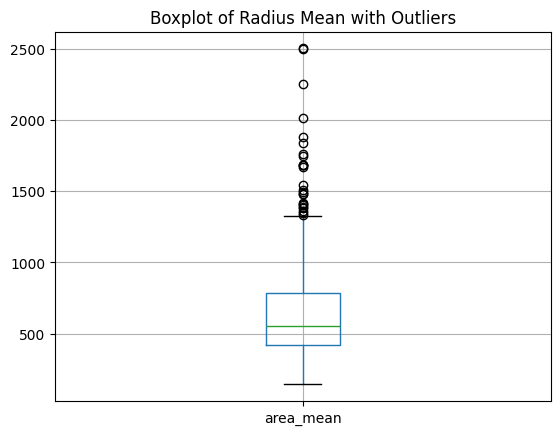

In [42]:
cancer_data.boxplot(column=['area_mean'])
plt.title("Boxplot of Radius Mean with Outliers")
plt.show()

ChatGPT said:

Kode tersebut berfungsi menampilkan boxplot untuk salah satu kolom numerik pada dataset cancer. Melalui fungsi boxplot(), pola persebaran data dan kemungkinan adanya nilai pencilan dapat terlihat dengan jelas, sementara plt.title() memberikan judul pada grafik. Setelah itu, plt.show() digunakan untuk menampilkan visualisasi tersebut ke layar.

In [44]:
cancer_data['radius_mean'].fillna(cancer_data['radius_mean'].median(), inplace=True)
cancer_data['area_mean'].fillna(cancer_data['area_mean'].median(), inplace=True)

/tmp/ipython-input-2862538610.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cancer_data['radius_mean'].fillna(cancer_data['radius_mean'].median(), inplace=True)
/tmp/ipython-input-2862538610.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

Kode tersebut digunakan untuk mengatasi nilai yang hilang pada dua kolom dalam dataset. Baris pertama mengisi nilai kosong pada kolom radius_mean dengan nilai median kolom tersebut, dan baris kedua melakukan pengisian yang sama untuk kolom area_mean

In [46]:
cancer_data.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


Perintah cancer_data.isnull().sum() digunakan untuk melihat jumlah nilai yang hilang pada setiap kolom di dalam dataset. Melalui output yang diberikan, dapat diketahui kolom mana yang memili data kosong dan perlu dilakukan proses pembersihan.

In [47]:
cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Perintah cancer_data.describe() digunakan untuk menghasilkan ringkasan statistik dasar dari setiap kolom numerik pada dataset. Output yang ditampilkan mencakup nilai minimum, maksimum, rata-rata, serta ukuran sebaran data.

In [48]:
cancer_data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


Perintah cancer_data['diagnosis'].value_counts() digunakan untuk menghitung jumlah setiap kategori yang terdapat pada kolom diagnosis. Output menunjukkan frekuensi kemunculan masing-masing kelas, seperti kategori kanker jinak maupun ganas.

In [49]:
cancer_data['radius_mean'].value_counts()

,count
radius_mean,
12.340,4
11.060,3
10.260,3
12.770,3
13.050,3
...,...
19.810,1
13.540,1
13.080,1


Kode tersebut digunakan untuk menghitung seberapa sering setiap nilai muncul pada kolom radius_mean, sehingga memberikan gambaran tentang variasi ukuran radius rata-rata dalam dataset. Output value_counts() dapat digunakan untuk melihat pola persebaran nilainya.

In [50]:
cancer_data['area_mean'].value_counts()

,count
area_mean,
512.2,3
321.6,2
582.7,2
1138.0,2
477.3,2
...,...
1148.0,1
642.7,1
461.0,1


Perintah tersebut digunakan untuk menghitung frekuensi setiap nilai pada kolom area_mean, sehingga terlihat nilai mana yang paling sering muncul dan bagaimana sebaran ukuran area rata-rata dalam dataset.

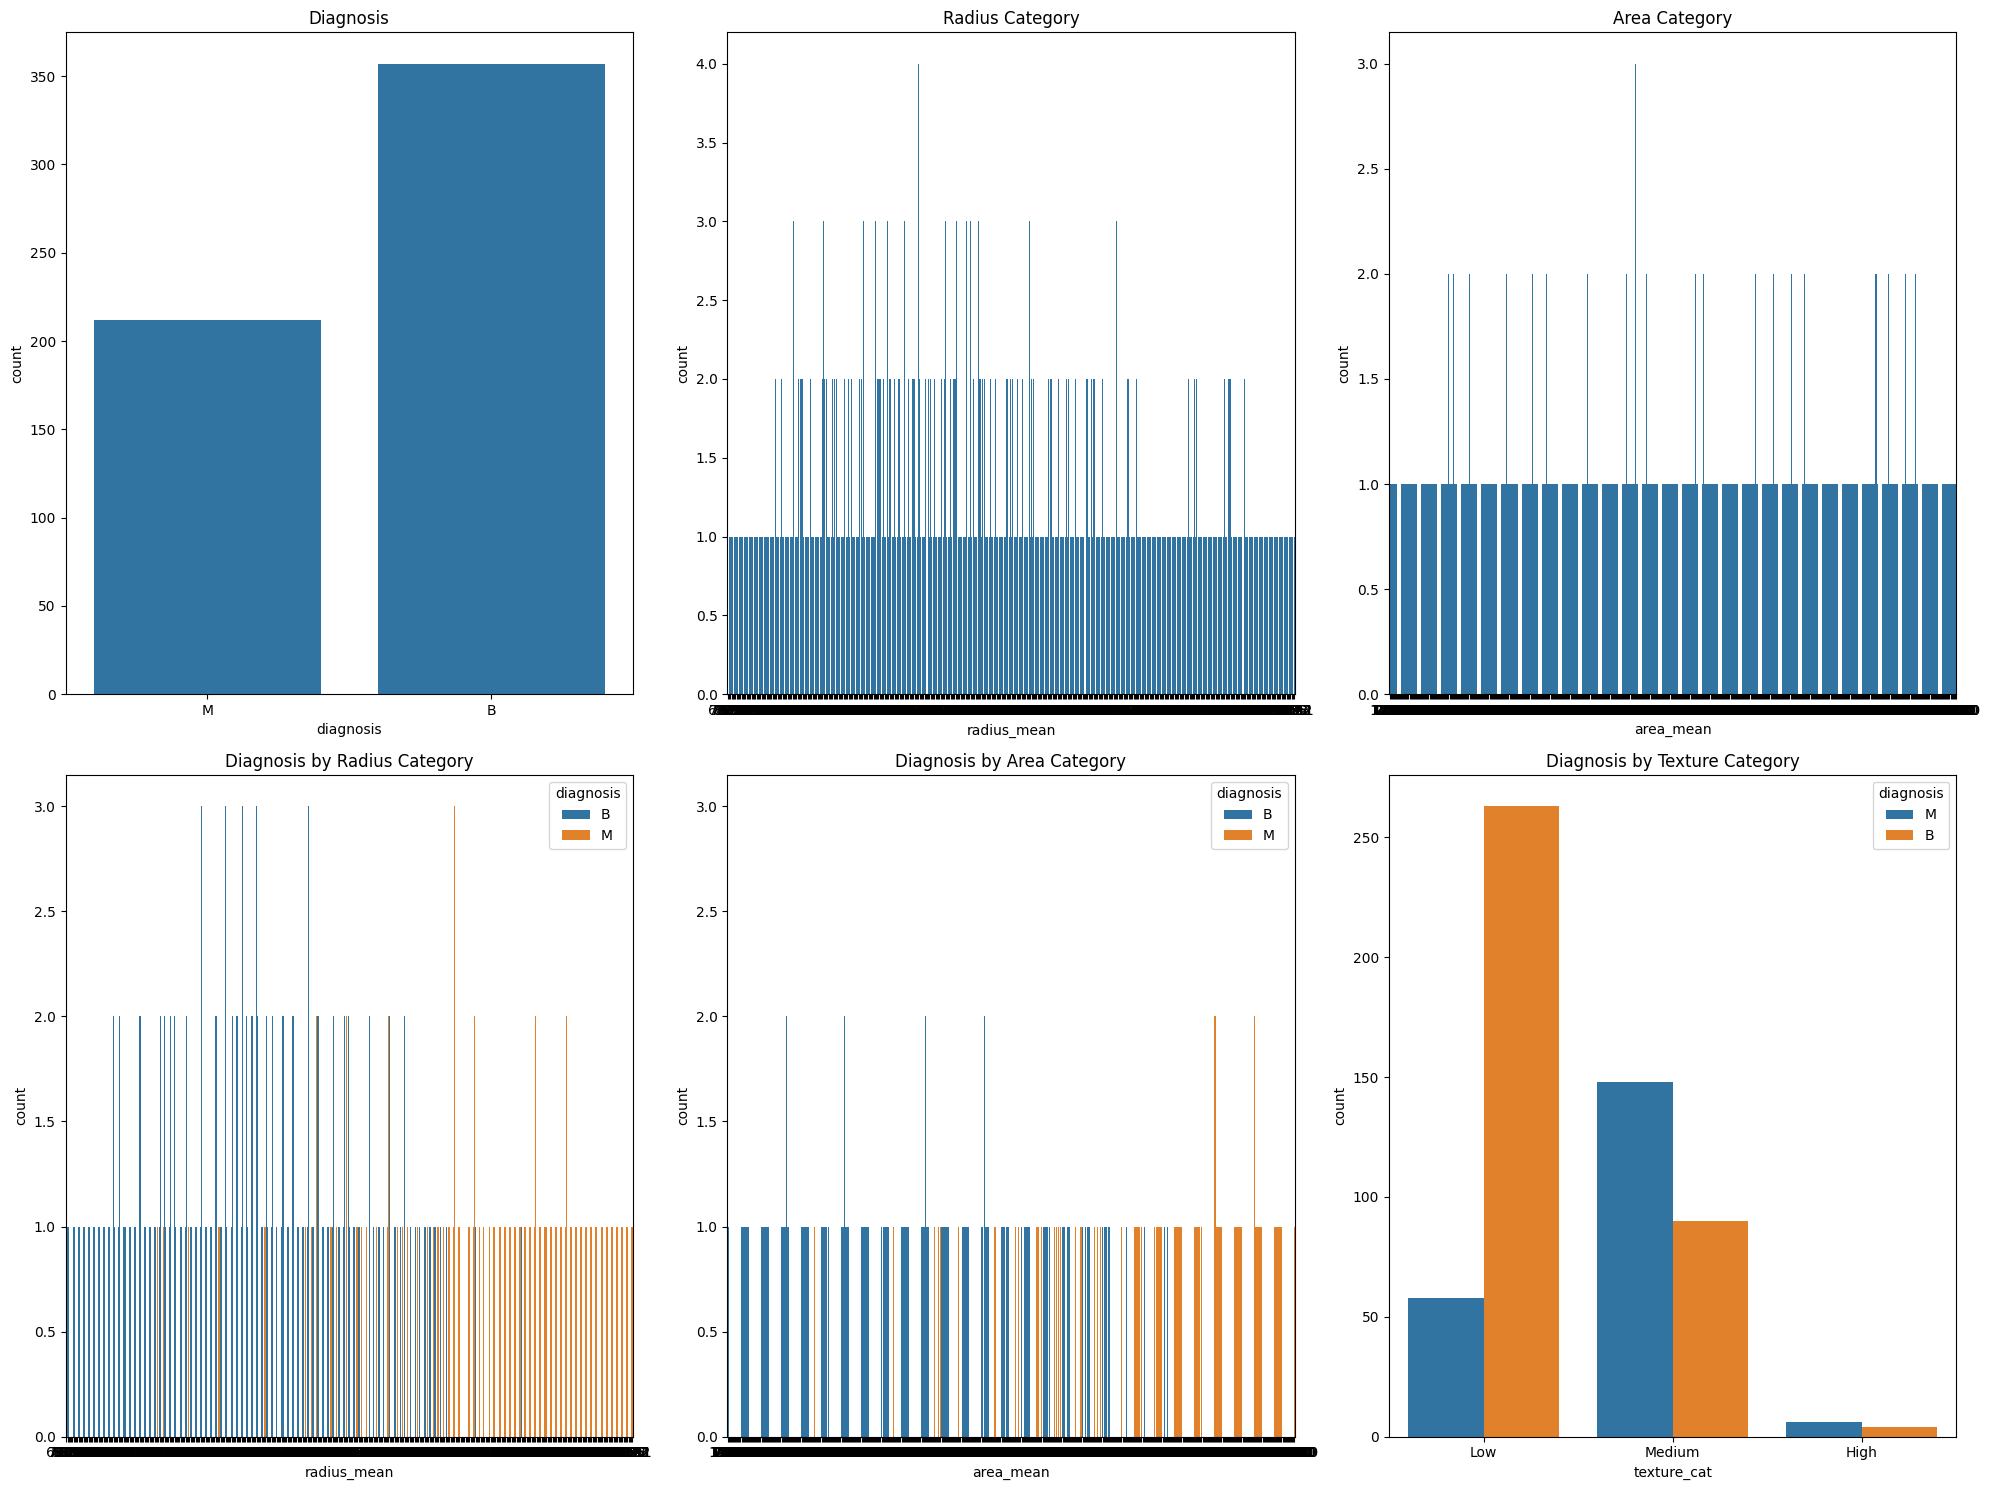

In [53]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = axes.flatten()

# 1. Diagnosis
sns.countplot(x='diagnosis', data=cancer_data, ax=axes[0])
axes[0].set_title('Diagnosis')

# 2. radius_mean (dikategorikan)
sns.countplot(x='radius_mean', data=cancer_data, ax=axes[1])
axes[1].set_title('Radius Category')

# 3. area_mean (dikategorikan)
sns.countplot(x='area_mean', data=cancer_data, ax=axes[2])
axes[2].set_title('Area Category')

# 4. Diagnosis berdasarkan radius category
sns.countplot(x='radius_mean', hue='diagnosis', data=cancer_data, ax=axes[3])
axes[3].set_title('Diagnosis by Radius Category')

# 5. Diagnosis berdasarkan area category
sns.countplot(x='area_mean', hue='diagnosis', data=cancer_data, ax=axes[4])
axes[4].set_title('Diagnosis by Area Category')

# 6. Diagnosis berdasarkan texture category
cancer_data['texture_cat'] = pd.cut(cancer_data['texture_mean'], bins=3, labels=['Low', 'Medium', 'High'])
sns.countplot(x='texture_cat', hue='diagnosis', data=cancer_data, ax=axes[5])
axes[5].set_title('Diagnosis by Texture Category')

plt.tight_layout()
plt.show()

Kode tersebut digunakan untuk menampilkan enam grafik countplot dalam satu tampilan dengan susunan subplot berformat 2 baris dan 3 kolom. Masing-masing grafik menunjukkan frekuensi data dari beberapa kolom, seperti diagnosis, radius_mean, dan area_mean, termasuk pola hubungannya dengan kategori diagnosis kanker. Selain itu, kolom texture_mean diubah menjadi kategori terlebih dahulu agar perbedaan distribusi diagnosis dapat terlihat dengan lebih jelas saat divisualisasikan.

In [54]:
replacements = {
    'diagnosis': {'M': 1, 'B': 0}
}

cancer_data.replace(replacements, inplace=True)

/tmp/ipython-input-4286787691.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cancer_data.replace(replacements, inplace=True)


Kode tersebut mengubah nilai kategori pada kolom diagnosis menjadi angka, sehingga data lebih mudah diproses pada tahap analisis atau pemodelan.

In [82]:
X = cancer_data.drop(columns=['diagnosis', 'Unnamed: 32', 'id', 'texture_cat'])
Y = cancer_data['diagnosis']

Kode tersebut digunakan untuk membagi dataset menjadi dua komponen sebelum tahap pemodelan. Variabel X menyimpan seluruh fitur yang dijadikan sebagai input, yaitu semua kolom selain diagnosis, sedangkan Y memuat kolom diagnosis yang berperan sebagai target prediksi. Pemisahan dataset ini sebagai proses pelatihan model agar dapat dilakukan secara terstruktur.

In [83]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


X.head() digunakan untuk menampilkan beberapa baris awal dari kumpulan fitur yang digunakan sebagai input pada model, sehingga struktur dan nilai awal data dapat terlihat dengan jelas.

In [84]:
Y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


Y.head() digunakan untuk menampilkan baris awal dari kolom target yang akan diprediksi, sehingga jenis dan pola nilai target dapat diperiksa sebelum proses pemodelan dimulai.

In [85]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

Perintah train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42) digunakan untuk memisahkan data menjadi data latih dan data uji. Parameter test_size=0.2 menentukan bahwa 20% dari seluruh data dialokasikan sebagai data uji, sementara stratify=Y menjaga agar proporsi setiap kelas pada target tetap seimbang pada kedua subset. Penggunaan random_state=42 memastikan proses pembagian data menghasilkan hasil yang sama setiap kali kode dijalankan

In [86]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Perintah print(X.shape, X_train.shape, X_test.shape) digunakan untuk menampilkan dimensi data fitur X, serta ukuran data latih dan data uji yang terbentuk setelah proses pembagian. Informasi ini memperlihatkan jumlah baris dan kolom pada masing-masing dataset, sehingga dapat dipastikan bahwa pembagiannya telah sesuai dan tidak ada data yang hilang.

In [87]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

GaussianNB()

Kode tersebut digunakan untuk menjalankan proses standarisasi data dan pelatihan model Naive Bayes. Tahap StandardScaler() digunakan untuk menyamakan skala setiap fitur, di mana fit_transform() diterapkan pada data latih dan transform() pada data uji. Setelah proses standarisasi selesai, model GaussianNB dilatih melalui perintah nb_model.fit(X_train_scaled, Y_train) agar dapat mengenali pola diagnosis berdasarkan fitur yang telah dinormalisasi.

In [88]:
# Accuracy
train_pred_nb = nb_model.predict(X_train_scaled)
test_pred_nb = nb_model.predict(X_test_scaled)

Kode tersebut digunakan untuk memperoleh hasil prediksi dari model Naive Bayes pada data latih dan data uji. Perintah nb_model.predict(X_train_scaled) menghasilkan prediksi untuk data latih, sedangkan nb_model.predict(X_test_scaled) menghasilkan prediksi untuk data uji.

In [89]:
print("Training Accuracy (NB): ", accuracy_score(Y_train, train_pred_nb))
print("Testing Accuracy (NB): ", accuracy_score(Y_test, test_pred_nb))

Training Accuracy (NB):  0.945054945054945
Testing Accuracy (NB):  0.9210526315789473


Kode tersebut digunakan untuk menunjukkan nilai akurasi model Naive Bayes pada data latih maupun data uji. Fungsi accuracy_score(Y_train, train_pred_nb) menghitung tingkat kecocokan prediksi terhadap data latih, sedangkan accuracy_score(Y_test, test_pred_nb) mengukur akurasi model pada data uji

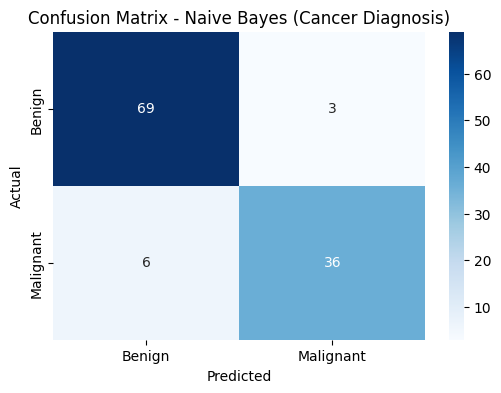

In [90]:
# Visualisasi Confusion Matrix (Naive Bayes)
plt.figure(figsize=(6,4))
cm_nb = confusion_matrix(Y_test, test_pred_nb)

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])

plt.title("Confusion Matrix - Naive Bayes (Cancer Diagnosis)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion matrix tersebut menggambarkan kemampuan model Naive Bayes dalam membedakan diagnosis kanker jinak dan ganas. Nilai pada diagonal menunjukkan 69 kasus jinak dan 36 kasus ganas berhasil diklasifikasikan dengan benar, yang menandakan performa model cukup baik. Adapun kesalahan prediksi terjadi pada 3 kasus jinak yang terbaca sebagai ganas dan 6 kasus ganas yang terklasifikasi sebagai jinak, sehingga memberikan gambaran rinci mengenai pola kekeliruan model dalam proses klasifikasi

In [91]:
print("\nClassification Report (NB):")
print(classification_report(Y_test, test_pred_nb))


Classification Report (NB):
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        72
           1       0.92      0.86      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Laporan klasifikasi tersebut menunjukkan bahwa model Naive Bayes memiliki performa yang kuat pada kedua kelas diagnosis. Untuk kelas jinak, precision, recall, dan f1-score berada pada kisaran tinggi, menandakan deteksi yang sangat baik, sementara pada kelas ganas precision tetap tinggi meskipun recall sedikit lebih rendah sehingga masih ada beberapa kasus yang terlewat. Secara keseluruhan, akurasi 0.92 beserta konsistensi ketiga metrik utama menunjukkan bahwa model bekerja stabil dalam membedakan kanker jinak dan ganas

In [92]:
from sklearn.model_selection import cross_val_score

cv_nb = cross_val_score(nb_model, X, Y, cv=5, scoring='accuracy')
print("\nNaive Bayes Cross Validation Accuracy (5-Fold):")
print("Scores:", cv_nb)
print("Mean Accuracy:", cv_nb.mean())
print("Std Deviation:", cv_nb.std())


Naive Bayes Cross Validation Accuracy (5-Fold):
Scores: [0.92105263 0.92105263 0.94736842 0.94736842 0.95575221]
Mean Accuracy: 0.9385188635305075
Std Deviation: 0.014585994424363306


Hasil cross-validation lima lipat menunjukkan bahwa model Naive Bayes memiliki akurasi yang stabil pada setiap pembagian data, dengan skor berada di kisaran 0.92 hingga 0.95. Rata-rata akurasi sekitar 0.94 dan standar deviasi yang rendah menandakan bahwa variasi performa antar lipatan sangat kecil. Hasil ini menunjukkan bahwa model mampu melakukan generalisasi dengan baik pada data diagnosis kanker